# **K-Nearest Neighbors**

In this exercise, you will build a classifier using the K-Nearest Neighbors algorithm.

---

### **1. Generating data**

You will start by generating synthetic data for this problem.  

- Generate a dataset with **n = 50 points** in a unit square. Each point should have an assigned label: orange or blue.  
  - Think about the rules to assign the labels (hint: you need a boundary rule to classify points as orange or blue).  
  - Store the x and y coordinates, along with the label, in a structured format.  
  - Vizualize the dataset.

---

### **2. The algorithm**

You will now use your generated dataset to determine the label of a new observation **(x₀, y₀)**. Here are the steps you should follow :

- Compute the distances between **(x₀, y₀)** and all points in your dataset.  
  - How will you calculate the distance ? 
  - What type of distance metric can you use ?  

- Select a value for **K**

- Identify the **K nearest neighbors** for your new point based on the distances you computed.  

- Based on the labels of the nearest neighbors, how would you decide the predicted class for the new observation ? Do it and explain your approach.

- Experiment with different values of **K** :  
  - Analyze how the prediction changes depending on different values for **K**.  
  - What happens when **K** is too small ? Too large ?

---

### **3. More complex dataset**

- Implement the K-Nearest Neighbors algorithm for datasets with more complicated shapes (generate these data, you can use your creativity).  
  - What happens to your prediction as the dataset structure becomes more complex ?

- Test your implementation by generating a random test set with new points. Measure how well your algorithm performs (e.g., accuracy, precision, recall).  

- Try using a different distance metric (e.g., Manhattan distance) to see how it impacts classification. Which metric feels more appropriate for your specific problem ?

---



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, f1_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Generating data:

# I will use rand function from numpy to generate 50 points that lie in a unit square and follow uniform distribution.
points = np.random.rand(50, 2)
X = points[:, 0] 
y = points[:, 1]

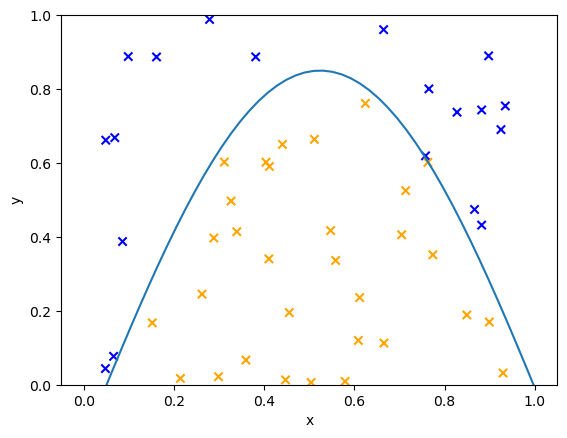

In [3]:
# Data will be labeled based on a sinusoid function: sin(3x) - 0.15
sinusoid = np.sin(X * 3) - 0.15

# Let's save labels into a new variable. Orange points will be under the function's line and blues will be located above.
labels = np.where(y < sinusoid, "orange", "blue")

labels_reshaped = labels.reshape(50, 1) # To concatanate points and labels further, labels should be reshaped into 2-D array.
# Final dataframe containing both points and labels for them.
df = pd.DataFrame(np.append(points, labels_reshaped, axis = 1), columns=["x", "y", "color"])

plt.scatter(X, y, c=labels, marker="x") # Scattering points on a plot
lin_space = np.linspace(0, 1, 50) # For a smooth curve of a sinusoid I'll generate 50 evenly distributed points.
plt.plot(lin_space, np.sin(lin_space * 3) - 0.15) # Plotting sinusoid on a graph.
plt.ylim(0,1) # Restricting y axis to 1.
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [75]:
# 2. The algorithm:

# Let's get a new observation
new_observ = [[0.85530906, 0.82197382]]
x0, y0 = new_observ[0]

For k = 17 the prediction is blue. Is the prediction correct? 1


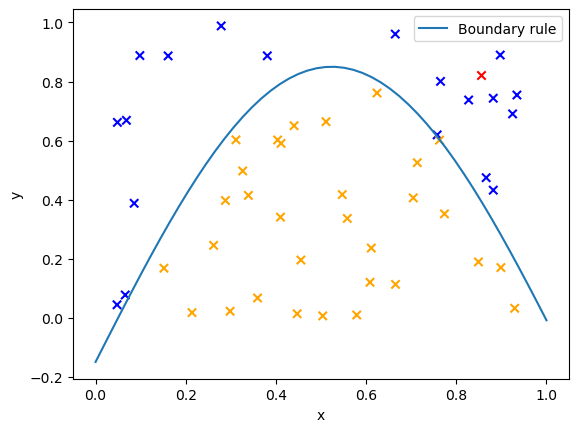

In [79]:
# I will use Euclidian distance, as we are working with 2-dimensional space:

def get_euclidian_distance(point_0, point_1):
    x0, y0 = point_0
    x1, y1 = point_1
    return np.sqrt( (x0 - x1) ** 2 + (y0 - y1) ** 2 )

# Computing distances between a new observation and other points and saving them to a list:
distances = [get_euclidian_distance(new_observ[0], point_1) for point_1 in points]
            
# Let's add a new column with distances to a dataframe:
df['distance'] = distances

# Sorting points based on a distance to new observation:
df_sorted = df.sort_values(by="distance")

# Let's pick k = 21. A label for a new observation will be set to orange, if most of it's neighbors are orange, and vice versa.

k_val = 17

# A function that will implement KNN-algorithm.
def knn_algo(k_neighbors, dframe, x0, y0):
    df_first_k = dframe.head(k_neighbors) # Getting first k closest points.

    count_oranges = 0 # Counter for orange neighbors.
    count_blues = 0 # Counter for blue neighbors.

    # Using a cycle computing the amount of different neighbors.
    for index, row in df_first_k.iterrows():
        if row["color"] == "orange":
            count_oranges += 1
        else:
            count_blues += 1


    # Now we are making a prediction based on the k nearest neighbors.
    # A function will return a predicted color and a boolean value: 1 for correct classification or 0 for a mistake.
    if count_oranges > count_blues and y0 < np.sin(x0 * 3) - 0.15:
        # (x0, y0) is predicted to be orange. True label: orange.
        return ['orange', 1]
    elif count_oranges < count_blues and y0 > np.sin(x0 * 3) - 0.15:
        # (x0, y0) is predicted to be blue. True label: blue.
        return ['blue', 1]
    if count_oranges > count_blues and y0 > np.sin(x0 * 3) - 0.15:
        # (x0, y0) is predicted to be orange. True label: blue.
        return ['orange', 0]
    if count_oranges < count_blues and y0 < np.sin(x0 * 3) - 0.15:
         # (x0, y0) is predicted to be blue. True label: orange.
        return ['blue', 0]

res = knn_algo(k_val, df_sorted, x0, y0)
print(f"For k = {k_val} the prediction is {res[0]}. Is the prediction correct? {res[1]}") # Printing the result.

# Again. lets plot our data and add a new observation to it (red cross).
plt.scatter(X, y, c=labels, marker="x") # Scattering points on a plot
plt.scatter(x0, y0, color="red", marker="x") # Plotting a new point.
plt.plot(lin_space, np.sin(lin_space * 3) - 0.15, label="Boundary rule") # Sinusoid.
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Total number of tested k-values: 49.
The number of properly classified points: 21
The number of misclassified points: 26


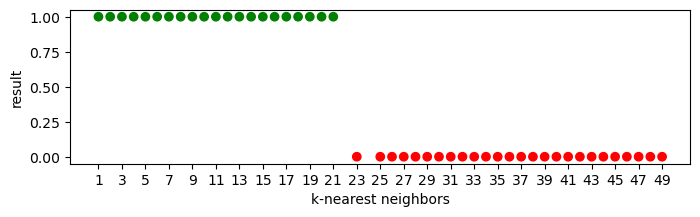

In [81]:
# Let's experiment with different k values. We will try values from 3 to 49.

k_values = []
k_outcomes = []
k_colors = []

# In a cycle, applying knn algorithm to the dataset:
for k in range(1, 50):
    result = knn_algo(k, df_sorted, x0, y0)
    if result is not None: # For even k we can get None, we will ignore this outcomes.
        k_values.append(k)
        k_outcomes.append(result[1])
print("Total number of tested k-values: 49.")
print(f"The number of properly classified points: {k_outcomes.count(1)}")
print(f"The number of misclassified points: {k_outcomes.count(0)}")

# Let's show the results of different k values on a plot. Green values are for successful predictions, red values are for wrong predictions.
plt.figure(figsize=(8, 2))
plt.xticks(range(1, 51, 2))
plt.xlabel("k-nearest neighbors")
plt.ylabel("result")
plt.scatter(k_values, k_outcomes, c=['green' if _ == 1 else 'red' for _ in k_outcomes])

For x0 = 0.85530906, y0= 0.82197382 correct predictions are made by using small k-neighbors: from 1 to 22. We can also experiment with different (x0, y0) points and see that algorithm's results will heavily depend on point's location.

(1456, 3)


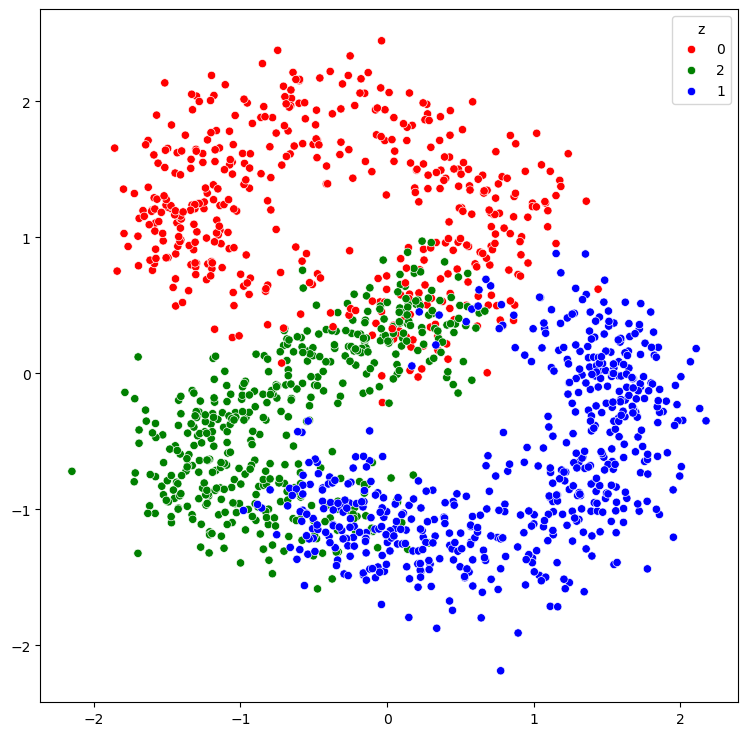

In [83]:
# 3. More complex dataset. To generate data, I'll use website: https://drawdata.xyz
# Points are stored in data-4.csv file
data_4_df = pd.read_csv('data-4.csv')
scaler = StandardScaler() # Let's scale our points to avoid large numbers

X1 = data_4_df.loc[:, ['x', 'y']] # X1 stores coordintaes
X1 = scaler.fit_transform(X1) # Scaling coordinates.

pd.set_option('future.no_silent_downcasting', True) # Prevents a notification in terminal.

# Replacing existing labels with numerical values in order to prevent value errors when working with KNN classifier.
data_4_df["z"] = data_4_df["z"].replace('a', '0') 
data_4_df["z"] = data_4_df["z"].replace('b', '1')
data_4_df["z"] = data_4_df["z"].replace('c', '2')
y1 = data_4_df["z"] # y1 stores solors for each point
# Visualising new dataset:
plt.figure(figsize=(9,9))
sns.scatterplot(x=X1[:, 0], y=X1[:, 1], hue=y1, palette=['red', 'green', 'blue'])

print(data_4_df.shape)

The best value for accuracy score is: 0.8873626373626373
The best value for F1 score is: 0.8810717310825465


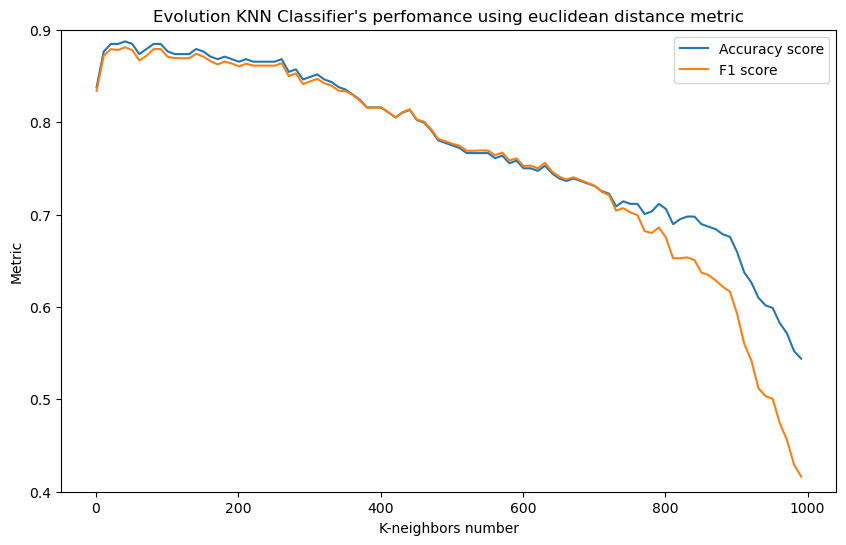

The best value for accuracy score is: 0.8901098901098901
The best value for F1 score is: 0.8839203881177747


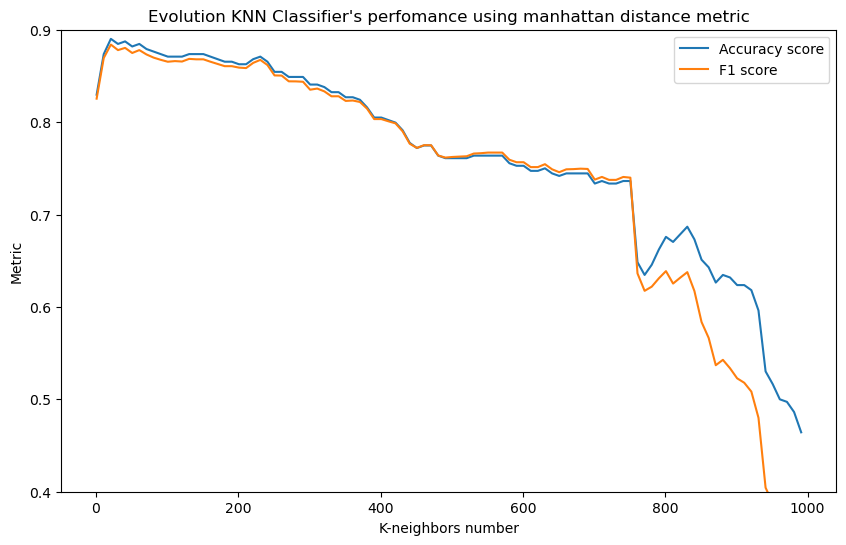

The best value for accuracy score is: 0.8379120879120879
The best value for F1 score is: 0.8169997408229189


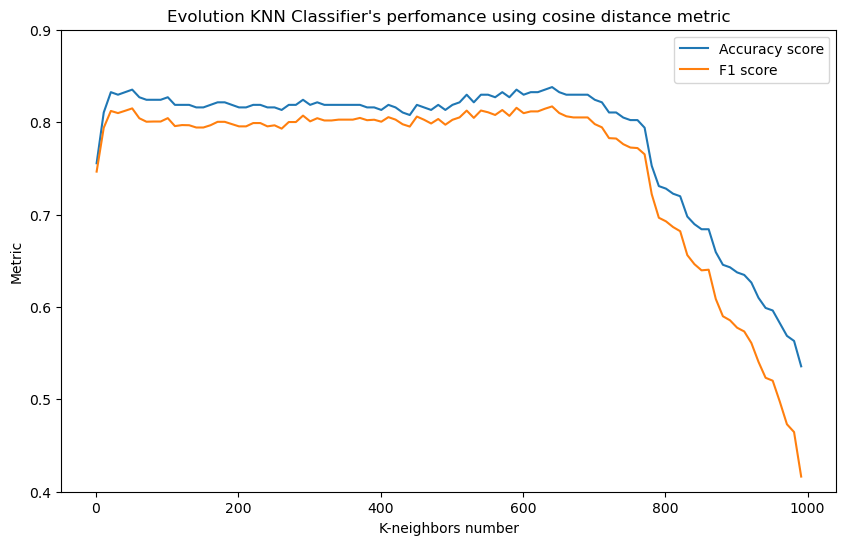

In [85]:
# Let's split data into train and test sets.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

# A function that will implement knn classification using different paramaters:
def knn_implementation(k_min, k_max, step, X_train, y_train, X_test, y_test, distance_metric):
    # Lists to store perfomance scores.
    accuracy_arr =[]
    f1_arr = []

    # In a cycle, we will define our knn classifier and experiment with different values of k. 
    for k in range(k_min, k_max + 1, step):
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
        # Training the model:
        knn.fit(X_train, y_train)
        # Making predictions:
        y_pred = knn.predict(X_test)
        
        accuracy_arr.append(accuracy_score(y_test, y_pred))
        f1_arr.append(f1_score(y_test, y_pred, average="macro"))

    # Let's output some statistics:
    print(f"The best value for accuracy score is: {max(accuracy_arr)}")
    print(f"The best value for F1 score is: {max(f1_arr)}")

    # Plotting how the scores changed with the k values respectively:
    plt.figure(figsize=(10,6))
    plt.plot(range(k_min, k_max + 1, step), accuracy_arr, label="Accuracy score")
    plt.plot(range(k_min, k_max + 1, step), f1_arr, label = "F1 score")
    plt.title(f"Evolution KNN Classifier's perfomance using {distance_metric} distance metric")
    plt.xlabel("K-neighbors number")
    plt.ylabel("Metric")
    plt.ylim(0.4, 0.9)
    plt.legend()
    plt.show()

# In this section I will use values from 1 to 1000. There is a step = 10, to avoid long execution.
knn_implementation(1, 1000, 10, X1_train, y1_train, X1_test, y1_test, 'euclidean')

knn_implementation(1, 1000, 10, X1_train, y1_train, X1_test, y1_test, 'manhattan')

knn_implementation(1, 1000, 10, X1_train, y1_train, X1_test, y1_test, 'cosine')

The best scores of Manhattan metric turned out to be the highest (0.89 accuracy), and the perfomance of Euclidian distance differs slightly (0.88 accuracy). Cosine distance could not reach such results, but it showed better perfomance for larger k values. 

---
---

# **Support Vector Machine**

A dataset contains two classes: Class A ($y=+1$ ) and Class B ($y=-1$). Your goal is to:

You are given six labeled data points in a 2D space:

| Point $ x_i $     | Label $ y_i $  |
|-------------------|---------------|
| $ x_1 = [2, 3] $   | $ +1 $         |
| $ x_2 = [1, 2] $   | $ +1 $         |
| $ x_3 = [3, 1] $   | $ +1 $         |
| $ x_4 = [1, 0] $   | $ -1 $         |
| $ x_5 = [2, -1] $  | $ -1 $         |
| $ x_6 = [0, 0] $   | $ -1 $         |

---

### **1. Sketch & intuition**
- **1.1:** Plot the six points on a 2D graph with $ x_1 $ -$ x_2 $  axes. Do the two classes form distinct clusters ?
- **1.2:** What does it mean for the two classes to be linearly separable ? What would this imply about the complexity of the classification problem ?
- **1.3:** Are the two classes linearly separable ? If yes, arbitrarily sketch a decision boundary (no need to optimize it yet).
- **1.4:** What is the margin in the context of a decision boundary?
- **1.5:** Why would we like to maximize the margin ? What might happen if the margin is very small ? (think about new observations and future predictions)

---

### **2. Decision Boundary for Hard-Margin**
The decision boundary for an SVM is represented as:

$$
x^T \beta + \beta_0 = 0, \quad \text{where } \beta = [\beta_1, \beta_2]^T \text{are some weights}, \text{ and } \beta_0 \text{ is the intercept.}
$$

- **2.1:** Write down the margin constraints:

$$
y_i (\beta^T x_i + \beta_0) \geq 1
$$

For each observation ($ x_1, x_2, ..., x_6 $ ), substitute $x_i$  and $y_i$  into the inequality.

- **2.2** What does the margin constraint enforce for a correctly classified point ? Explain what this constraint means for points with $y_i=+1$ and $y_i=−1$.

- **2.3** Lets say our solver choose random initial values to specify a decision boundary:
    - $\beta = [1, -1]^T$ 
    - $\beta_0 = 0$

Verify step by step, whether the margin constraint is satisfied for each observation ($x_1, x_2, \ldots, x_6$ ) given their respective labels ($y_1, y_2, \ldots, y_6$ ). Sketch the decision line.

- **2.4** At the second iteration, our solver updates the parameters : $\beta = [2, 2]^T$ & $\beta_0 = -4$. Check again the conditions for each observations and draw the line. Does the margin look to be maximized here ? Compute its lenght :  $$M = \frac{1}{||\beta||}$$,
where $ ||\beta|| = \sqrt{\beta_1^2 + \beta_2^2} $ .



- **2.5: Using sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), write a code to find the decision line that maximize the margin. What are the estimated parameters ? Plot the line.**
    (Hint : use the linear kernel parameter)



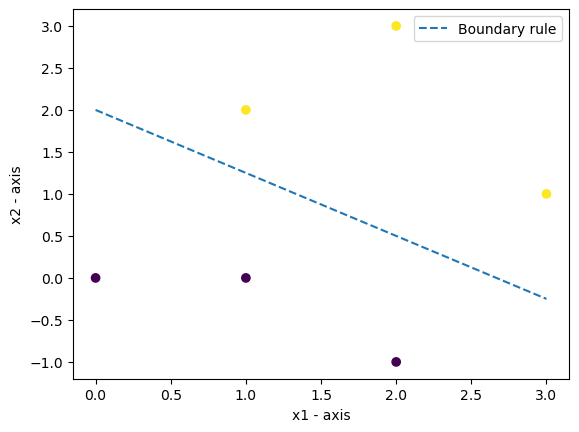

In [87]:
# 1. Sketch intuition:

# 1.1. Plot the six points on a 2D graph with  x1 x2 axes.
# Let's make a dataframe with given points:
X = np.array([[2, 3], [1,2], [3,1], [1,0], [2,-1], [0,0]])
y = np.array([1, 1, 1, -1, -1, -1])
svm_df = pd.DataFrame(np.append(X, y.reshape(6, 1), axis = 1), columns=["x1", "x2", "y"])
lin_space_svm = np.linspace(0, 3, 20) # Values for x1 variable, they will be used for correct representation of a graph.
# Plotting points on a graph:
plt.scatter(X[:,0], X[:,1], c=y)
# Sketching a possible boundary for 2 classes. Equation: -0.75 * x + 2
plt.plot(lin_space_svm, -0.75*(lin_space_svm) + 2, label="Boundary rule", linestyle='dashed')
plt.xlabel("x1 - axis")
plt.ylabel("x2 - axis")
plt.legend()
plt.show()
# The classes (yellow and purple) form two different clusters on a graph.

1.2. Two classes are linearly separable when they can be divided by a linear boundary. Linear seperability implies simple classification, which does not require complex model.
1.3. Classes are linearly separable.
1.4. Margin is the distance from a desicion boundary to closest points from each class. Maximizing this margin helps us to make better classifications for new observations, because it is not sensitive to small fluctuations in the data set. With a small margin, we can a model can perfectly perform on a training set. But all the points, that slighlty outlies our training cluster, will be misclassified.

2.2 The margin constraint ensures that distance between a point and a boundary line is at least 1 unit. A point is located above the hyperplane for y=+1, and for y=-1 it is under the hyperplane.

2.5. The margin does not seem to be maximized, as it lies closer to -1 class points.

0.49984000000000006 0.9996800000000001 -1.4994133333333337


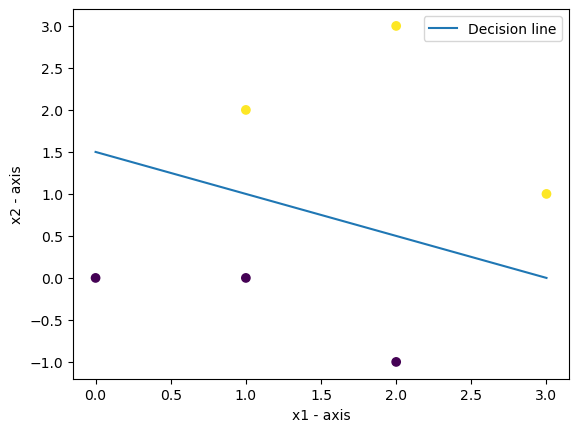

In [89]:
# 2.5. 
# Lets create a classifier:
clf = svm.SVC(kernel="linear", C=10 ** 5)

# Fitting the model:
clf.fit(X, y)

# Saving weights and intercept:
b1, b2 = clf.coef_[0]
b0 = clf.intercept_[0]
print(b1, b2, b0) # The estimated parameters.

# Let's derive the formula for the boundary line: x1 * b1 + x2 * b2 + b0 = 0 .
# Thus, x2 = -x1 * (b1 / b2) - (b0 / b2) .
# Let's plot the decision line. 
plt.plot(lin_space_svm,  (-1) * lin_space_svm * (b1 / b2) - (b0 / b2), label="Decision line" ) 
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("x1 - axis")
plt.ylabel("x2 - axis")
plt.plot()
plt.legend()
plt.show()

In [91]:
# Slack Variables for a Sofr Margin:
# 3.1. Check for each observation if the point violates the soft-margin constraint. Compute the slack variable  for each point.

# Firstly, let's add new observations to existing arrays:
X = np.append(X, [[1, 3], [3, -2]], axis = 0)
y = np.append(y, [-1, 1])

In [93]:
# Now let's create a list for slack variables:
slack_var_list = []

for i in range(8):
    # Let's compute the slack variable by a given formula and add it to the list: 
    slack = max(0, 1 - y[i] * (b1 * X[i][0] + b2 * X[i][1] + b0) )
    slack_var_list.append(slack)

    # 3.3. Let's identify points that violate the margin:
    if slack == 0:
        print(f"Point x{i+1} = {X[i][0], X[i][1]}, y{i+1}={y[i]} does not violate the soft margin.")
    else:
        print(f"Point x{i+1} = {X[i][0], X[i][1]}, y{i+1}={y[i]} violates the soft margin. The slack variable is: {slack}")
    print()
    
# 3.3. Computing the total slack:
print(f"Total slack is: {sum(slack_var_list)}.")

Point x1 = (2, 3), y1=1 does not violate the soft margin.

Point x2 = (1, 2), y2=1 violates the soft margin. The slack variable is: 0.0002133333333336207

Point x3 = (3, 1), y3=1 violates the soft margin. The slack variable is: 0.0002133333333336207

Point x4 = (1, 0), y4=-1 violates the soft margin. The slack variable is: 0.0004266666666663532

Point x5 = (2, -1), y5=-1 does not violate the soft margin.

Point x6 = (0, 0), y6=-1 does not violate the soft margin.

Point x7 = (1, 3), y7=-1 violates the soft margin. The slack variable is: 2.9994666666666667

Point x8 = (3, -2), y8=1 violates the soft margin. The slack variable is: 2.9992533333333338

Total slack is: 5.999573333333334.


3.2. Slack variable is zero for well classified observations.


---

### **3. Slack Variables for a Soft-Margin**
In real-world datasets, perfect separation might not be possible as the data might be mixed. 

Lets add two new observations : 
- $ x_7 = [1, 3] $  with $y_7 = +1 $
- $ x_8 = [3, -2] $  with $y_8 = -1 $


Slack variables ($ \xi_i $ ) can be added to relax the SVM constraint for incorrectly classified or margin-violating points:

$$

y_i (\beta^T x_i + \beta_0) \geq 1 - \xi_i, \quad \xi_i \geq 0

$$


They are computed by the Hinge Loss function:

$$
\xi_i = \max(0, 1 - y_i (\beta^T x_i + \beta_0))
$$

- **3.1: Check for each observation if the point violates the soft-margin constraint. Compute the slack variable $ \xi_i $  for each point.**


- **3.2: What is the slack variable when the observation is well classified ?**

- **3.3: Identify the points that violate the margin.**

- **3.3: Compute the total violation:**

$$

\text{Total Slack:} \quad \sum_{i=1}^n \xi_i.

$$

---

### **4. Adding Slack Variables to the Objective Function**

The objective function that we used for the hard margin can be modified to include the penalty term for the slack variables. By doing so, our final problem is :

$$
 \text{minimize} \quad \frac{1}{2} \|\beta\|^2 + C \sum_{i=1}^{n} \xi_i 
$$

subject to :

$$
 y_i (\beta \cdot x_i + b) \geq 1 - \xi_i \quad \forall i 
$$



$$
 \xi_i \geq 0 \quad \forall i 
$$

Where, 

1. $ \frac{1}{2} \|\beta\|^2 $ encourages a large margin by minimizing the norm of the weight vector.
2. $C \sum_{i=1}^{n} \xi_i$ penalizes the slack variables. $C$  is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.
3. $ y_i (\beta \cdot x_i + b) \geq 1 - \xi_i $ : This constraint allows for some points to be within the margin or misclassified, thanks to the slack variable.
4. $ \xi_i \geq 0 $ : Ensures that slack variables are non-negative.

By adding slack variables to the objective function, the soft margin SVM can handle non-separable data more effectively, balancing the need for a large margin with the practical reality of misclassifications.

- **4. How does increasing or decreasing C affect the trade-off between maximizing the margin and minimizing classification errors ?**

---


When C value is decreasing, both the margin and misclassification rates are growing. Inversely, when we increase the C parameter, margin becomes smaller and classification errors are decreasing.